In [1]:
import torch
import numpy as np
import itertools
import csv
import matplotlib.pyplot as plt

In [14]:
a = np.random.random((3,2))*10
a = a.astype(np.int32)
print(a)
b = np.resize(a, 6)
print(b.size)



[[8 7]
 [5 0]
 [5 3]]
6


numpy.float64

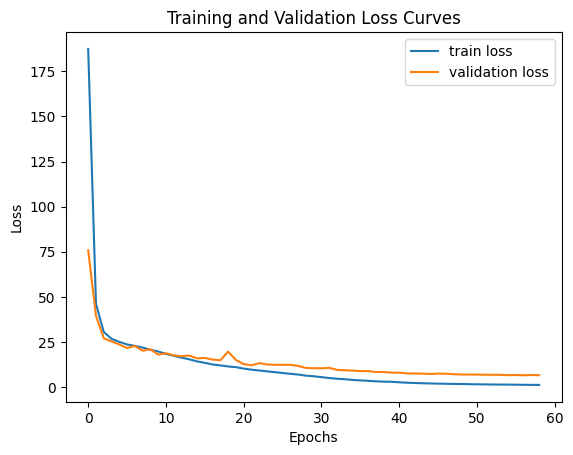

In [3]:
path = 'weights/all_camera/try01/loss'
data = []
with open(path, 'r') as f:
    aa = csv.reader(f)
    for row in aa:
        data.append(row)

data = data[1:-1]
data = np.array(data).astype(float)
plt.figure()
plt.plot(data[:, 0], label='train loss')
plt.plot(data[:, 1], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
type(data[1, 0])

In [3]:
import torch

# 假设你有四个三维图片张量，每个张量的形状为 (channels, height, width)
image1 = torch.rand(3, 64, 64)
image2 = torch.rand(3, 64, 64)
image3 = torch.rand(3, 64, 64)
image4 = torch.rand(3, 64, 64)

# 将这四个图片合并成一个批处理
batch = torch.stack([image1, image2, image3, image4])

# 打印批处理的形状
print(batch.shape)


torch.Size([4, 3, 64, 64])


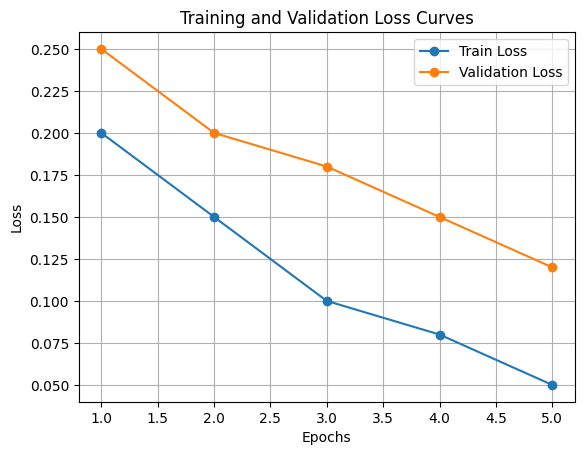

In [18]:
import matplotlib.pyplot as plt

# 示例数据（训练集和验证集损失值列表）
train_losses = [0.2, 0.15, 0.1, 0.08, 0.05]
val_losses = [0.25, 0.2, 0.18, 0.15, 0.12]

# 对应的epoch数（x轴）
epochs = list(range(1, len(train_losses) + 1))

# 绘制训练集损失曲线
plt.plot(epochs, train_losses, label='Train Loss', marker='o')

# 绘制验证集损失曲线
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')

# 显示图
plt.grid()
plt.show()
